# Tyler Rygg - Group 6 Project - Nice Ride Eau Claire

In this notebook I will:
    -Import and clean the Nice Ride data for 2018.
    -Perform analysis of data by age bracket.
    -Graph data and look at trends.
    -Draw conclusions from the analysis.

In [136]:
#Import dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt

#Create style sheet for group consistency 
plt.style.use("fivethirtyeight")

In [137]:
#Create file paths for .csv
file_path= "Resources/data_2018.csv"

#Read in .csv files
nice_ride_df= pd.read_csv(file_path)

In [138]:
#Show dataframe head
nice_ride_df.head()

,tripduration,start_time,end_time,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,bike type
0,2490,49:49.9,31:20.5,10.0,Midtown Exchange,44.948590,-93.260200,45.0,Franklin & Portland,44.962841,-93.267521,1354,Member,1966,2,Classic
1,228,29:22.1,33:10.5,16.0,22nd Ave S & Franklin Ave,44.962930,-93.241042,49.0,Franklin & 28th Ave,44.962701,-93.230893,933,Member,1968,1,Classic
2,80,15:30.3,16:51.1,21.0,Social Sciences,44.970639,-93.243552,209.0,Willey Hall,44.972404,-93.242891,621,Member,1957,2,Classic
3,755,02:00.8,14:36.4,10.0,Midtown Exchange,44.948590,-93.260200,31.0,Hennepin County Government Center,44.976602,-93.266701,1074,Member,1978,1,Classic
4,850,09:51.6,24:02.2,18.0,Walker Art Center,44.967104,-93.289075,31.0,Hennepin County Government Center,44.976602,-93.266701,680,Member,1982,1,Classic


In [139]:
#Drop unnecessary columns
#My analysis only deals with age but I kept columns for trip duration, usertype, gender, and bike type
#because I thought those could be interesting to look at within the individual age brackets.
#Keeping the user type became essential to my final analysis but the other columns were outside the scope of our analysis.
nicer_ride_df= nice_ride_df.drop(["start_time", "end_time", "start station id", "start station name", "start station latitude", 
                                  "start station longitude", "end station id", "end station name", "end station latitude", 
                                  "end station longitude", "bikeid"], axis= 1)
nicer_ride_df.head()

,tripduration,usertype,birth year,gender,bike type
0,2490,Member,1966,2,Classic
1,228,Member,1968,1,Classic
2,80,Member,1957,2,Classic
3,755,Member,1978,1,Classic
4,850,Member,1982,1,Classic


In [140]:
#Calculate rider age and create column
nicer_ride_df["User Age"]= 2018 - nicer_ride_df["birth year"]
nicer_ride_df.head()

,tripduration,usertype,birth year,gender,bike type,User Age
0,2490,Member,1966,2,Classic,52
1,228,Member,1968,1,Classic,50
2,80,Member,1957,2,Classic,61
3,755,Member,1978,1,Classic,40
4,850,Member,1982,1,Classic,36


In [141]:
#Determine youngest and oldest rider
print(f"Oldest rider in 2018 was {nicer_ride_df['User Age'].max()} years old.")
print(f"Youngest rider in 2018 was {nicer_ride_df['User Age'].min()} years old.")

Oldest rider in 2018 was 107 years old.
Youngest rider in 2018 was 18 years old.


In [150]:
#Bin ages in increments of 5 (i.e. 0-4, 5-9, 10-14,...80-84, >85)
#A little investigation revealed that the minumum age to ride is 18 years old.
bins= [0,24,29,34,39,44,49,54,59,64,69,74,79,84,109]
bin_names= ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54","55-59","60-64","65-69","70-74","75-79","80-84","85+"]

#Create column to store bin information.
nicer_ride_df["Age Group"]= pd.cut(nicer_ride_df["User Age"], bins, labels= bin_names)
nicer_ride_df.head(50)

,tripduration,usertype,birth year,gender,bike type,User Age,Age Group
0,2490,Member,1966,2,Classic,52,50-54
1,228,Member,1968,1,Classic,50,50-54
2,80,Member,1957,2,Classic,61,60-64
3,755,Member,1978,1,Classic,40,40-44
4,850,Member,1982,1,Classic,36,35-39
5,26023,Casual,1969,0,Classic,49,45-49
6,25987,Casual,1969,0,Classic,49,45-49
7,404,Member,1982,1,Classic,36,35-39
8,455,Member,1983,1,Classic,35,35-39
9,443,Member,1982,1,Classic,36,35-39


In [143]:
nicer_ride_df["Age Group"].value_counts()

45-49    189733
25-29     46876
30-34     39139
18-24     37477
35-39     28353
40-44     19626
55-59     15892
50-54     14998
60-64     11377
65-69      6594
70-74      1372
75-79       551
80-84       394
85+          41
Name: Age Group, dtype: int64

In [144]:
#Create list of sizes for pie chart and bar graph. sort=False so that values correspond with bin names.
sizes= nicer_ride_df["Age Group"].value_counts(sort= False).tolist()
sizes

[37477,
 46876,
 39139,
 28353,
 19626,
 189733,
 14998,
 15892,
 11377,
 6594,
 1372,
 551,
 394,
 41]

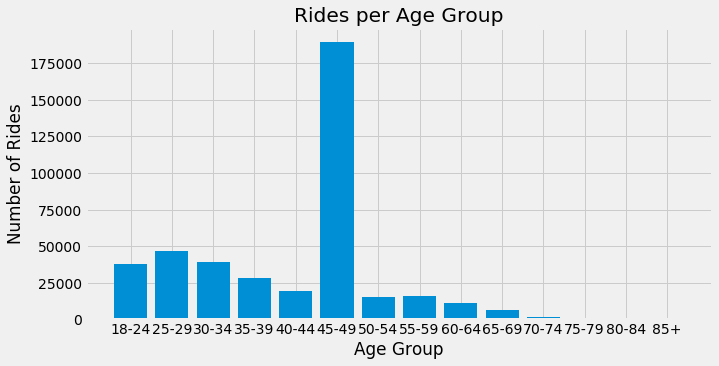

In [149]:
#Bar chart, number of rides per age group
#Expand figure so x ticks don't overlap.
plt.figure(figsize=(10,5))
plt.bar(bin_names, sizes)

#Creat plot and axes titles
plt.title("Rides per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Rides")

#Save figure and show
plt.savefig("Images/ridesbyage.png")
plt.show()

Note: This is where it became apparent that there were some quirks in the data.
The 45-49 age bracket was too large compared with the other brackets.
Looking through the dataframe I noticed that many of the casual riders were 49 years old and had no specified gender.
This led me to believe that many casual riders who did not input personal info defaulted to 49 years old.

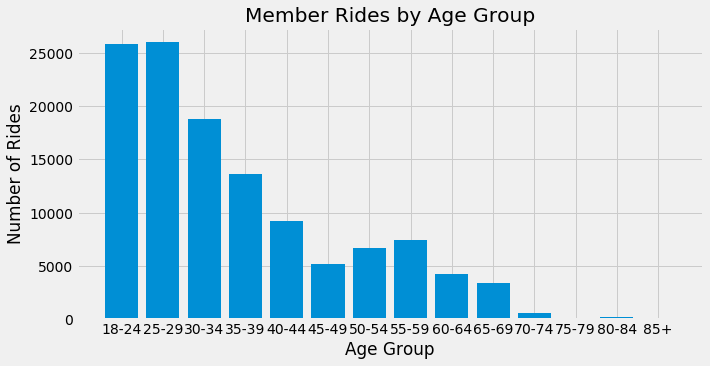

In [147]:
#Analyze member data, casual riders may be automatically placed in 45-49 age bracket
member_df= nicer_ride_df[nicer_ride_df.usertype != "Casual"]

#Create list of members only rides by age.
member_sizes= member_df["Age Group"].value_counts(sort=False).tolist()

#Expand figure
plt.figure(figsize=(10,5))
#Create plot
plt.bar(bin_names, member_sizes)
#Plot title and axes
plt.title("Member Rides by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Rides")
#Save figure and show
plt.savefig("Images/memberridesbyage.png")
plt.show()

The bar graph of members-only data seems to confirm the hypothesis that anonymous, casual users were skewing the data by defaulting to 49 years old and artificially inflating that age bracket. The members-only data shows popularity amongst riders aged 18-29 and then rapid decline in use bottoming out in the 45-49 age bracket before enjoying a small surge in popularity amongst 50-60 year olds. This is very different from what the casual rider data showed and isolating this quirk avoided a false conclusion about the rider ages.

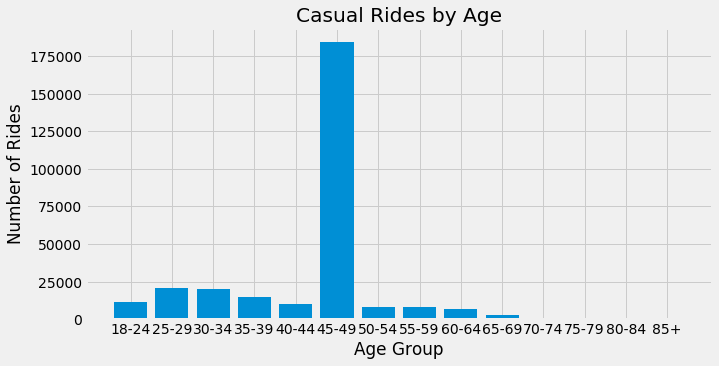

In [148]:
#Analyze casual user data to further illustrate need to remove from final analysis.

casual_rider_df= nicer_ride_df[nicer_ride_df.usertype != "Member"]

casual_sizes= casual_rider_df["Age Group"].value_counts(sort=False).tolist()

plt.figure(figsize=(10,5))
plt.bar(bin_names, casual_sizes)
plt.title("Casual Rides by Age")
plt.xlabel("Age Group")
plt.ylabel("Number of Rides")
plt.savefig("Images/casual_rides_bar.png")
plt.show()

Analysis of casual rides further illustrates need to eliminate anamoly.

In [160]:
#Report number of member and casual rides
pie_sizes= nicer_ride_df["usertype"].value_counts().tolist()

print(f'In 2018 there were {pie_sizes[0]} casual rides and {pie_sizes[1]} member rides.')

In 2018 there were 290947 casual rides and 121476 member rides.


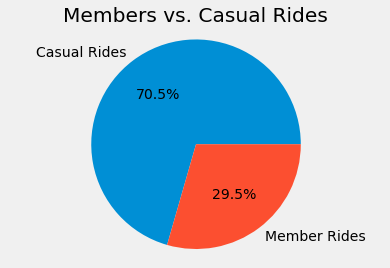

In [163]:
#Show members vs casual riders as pie chart
plt.pie(pie_sizes, labels= ("Casual Rides", "Member Rides"), autopct= '%1.1f%%')
plt.axis('equal')
plt.title('Members vs. Casual Rides')

#Save and show
plt.savefig("Images/user_pie.png")
plt.show()

There were 121,476 member rides accounting for nearly 30% of total rides in 2018. Excepting the 45-49 age bracket in the casual rider data reveals a trend similar to that of the member data. Popularity peaks in users aged 25-34 then gradually tapers off in each successive 5 year age bracket.

In [164]:
nicer_ride_df["User Age"].value_counts(sort=False)

18      1831
19      4049
20      5701
21      7784
22      5395
23      5968
24      6749
25      7702
26      8445
27      8818
28      8923
29     12988
30      9000
31      7848
32      9350
33      7344
34      5597
35      6826
36      6035
37      6094
38      5919
39      3479
40      5427
41      4248
42      2921
43      3200
44      3830
45      2908
46      1638
47      2412
       ...  
54      3935
55      3459
56      3089
57      3597
58      2553
59      3194
60      2333
61      2913
62      2067
63      1410
64      2654
65      1485
66      1950
67      1237
68      1103
69       819
70       515
71       483
72        82
73       158
74       134
75        98
76       161
78       107
79       185
80       159
81       235
87        21
96         3
107       17
Name: User Age, Length: 66, dtype: int64

Conclusion:
Nice Ride is most popular with users in the 18-34 age range. Ridership steadily declines in riders aged 35-49. After a slight bump in popularity amongst 50-60 year olds ridership declines rapidly in the 60+ age range.